# Running Biomechanics Data Set Exploratory files

Reginaldo K Fukuchi, Jan 2023, reginaldo.fukuchi@ufabc.edu.br

Check if the files mkr and forces are consistent with the existing RBDS Figshare

In [4]:
# Prepare environment
import os
import glob
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
# Import data
path_figshare = r'C:\Users\Reginaldo\Documents\data\CNPq\RBDS_v2\Figshare'
pathname = r'../data'

## Find files

In [7]:
fnames_mkr_25 = glob.glob(os.path.join(path_figshare,'RBDS0*runT25markers.txt'))

<IPython.core.display.Javascript object>


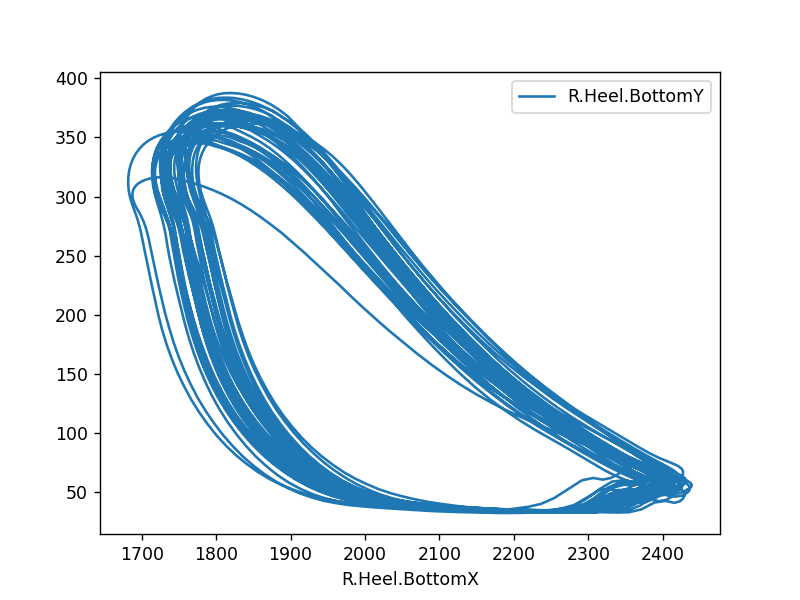

<AxesSubplot: xlabel='R.Heel.BottomX'>

In [8]:
df_R = pd.read_csv(fnames_mkr_25[0], delimiter='\t', index_col='Time')
df_R.plot(x='R.Heel.BottomX', y='R.Heel.BottomY', kind='line')

In [10]:
df_R.columns.tolist()

['R.ASISX',
 'R.ASISY',
 'R.ASISZ',
 'L.ASISX',
 'L.ASISY',
 'L.ASISZ',
 'R.PSISX',
 'R.PSISY',
 'R.PSISZ',
 'L.PSISX',
 'L.PSISY',
 'L.PSISZ',
 'R.Iliac.CrestX',
 'R.Iliac.CrestY',
 'R.Iliac.CrestZ',
 'L.Iliac.CrestX',
 'L.Iliac.CrestY',
 'L.Iliac.CrestZ',
 'R.Thigh.Top.LateralX',
 'R.Thigh.Top.LateralY',
 'R.Thigh.Top.LateralZ',
 'R.Thigh.Bottom.LateralX',
 'R.Thigh.Bottom.LateralY',
 'R.Thigh.Bottom.LateralZ',
 'R.Thigh.Top.MedialX',
 'R.Thigh.Top.MedialY',
 'R.Thigh.Top.MedialZ',
 'R.Thigh.Bottom.MedialX',
 'R.Thigh.Bottom.MedialY',
 'R.Thigh.Bottom.MedialZ',
 'R.Shank.Top.LateralX',
 'R.Shank.Top.LateralY',
 'R.Shank.Top.LateralZ',
 'R.Shank.Bottom.LateralX',
 'R.Shank.Bottom.LateralY',
 'R.Shank.Bottom.LateralZ',
 'R.Shank.Top.MedialX',
 'R.Shank.Top.MedialY',
 'R.Shank.Top.MedialZ',
 'R.Shank.Bottom.MedialX',
 'R.Shank.Bottom.MedialY',
 'R.Shank.Bottom.MedialZ',
 'R.Heel.TopX',
 'R.Heel.TopY',
 'R.Heel.TopZ',
 'R.Heel.BottomX',
 'R.Heel.BottomY',
 'R.Heel.BottomZ',
 'R.Heel.Late

In [ ]:
for f, fname in enumerate(fnames_mkr_25)
df_R = pd.read_csv(fnames_mkr_25, delimiter='\t', index_col='Time')

In [6]:
fname_R = os.path.join(pathname, 'RBDS001runT25forces.txt')
df_R = pd.read_csv(fname_R, delimiter='\t', index_col='Time')

28

In [ ]:
RBDS001runT25markers

## Import C3D RBDS file using EZC3D
https://github.com/pyomeca/ezc3d

In [3]:
import sys
sys.path.insert(1, r'../functions')
from svdt import svdt

In [4]:
from ezc3d import c3d

In [5]:
subject = 'RBDS0041'
task = 'runT252'

In [6]:
fname_c3d = os.path.join(pathname,task + '.c3d')
c = c3d(fname_c3d, extract_forceplat_data=True)

In [66]:
pf_1 = c["data"]["platform"][1]  # Select the second platform
# Force platform signals matching existing RBDS
fp1_forces = pf_1['force'].T # Forces
fp1_cop    = pf_1['center_of_pressure'].T # Centre of pressure
fp1_Ty     = pf_1['Tz'][1,:] # Free moment about vertical axis

In [67]:
fp1_Ty = np.expand_dims(fp1_Ty,axis=1)

In [68]:
# Concatenate signals
force_signals = np.hstack([fp1_forces, fp1_cop, fp1_Ty])

In [50]:
force_sigs_labels = ['Fx', 'Fy', 'Fz', 'COPx', 'COPy', 'COPz', 'Ty']

In [78]:
df_forces = pd.DataFrame(data=force_signals, columns=force_sigs_labels)

In [80]:
df_forces['Time'] = list(range(1,force_signals.shape[0]+1))
df_forces.set_index('Time', inplace=True)
df_forces.index.name = 'Time'

In [82]:
df_forces = df_forces.round(2)

In [83]:
df_forces.head()

Fx       Fy     Fz     COPx  COPy     COPz        Ty
Time                                                          
1    -128.78  1718.29 -74.77  2117.64   0.0  1552.29  13298.91
2    -105.74  1748.81 -76.68  2104.63   0.0  1552.08  19883.12
3    -104.60  1761.02 -64.47  2099.89   0.0  1552.42  20350.88
4     -69.73  1767.88 -71.56  2091.01   0.0  1552.56  15951.65
5     -67.75  1778.41 -79.42  2085.01   0.0  1552.54  15124.41

In [84]:
# Export to CSV
fname_forces_txt = os.path.join(pathname, subject+task+'forces.txt')
df_forces.to_csv(fname_forces_txt, sep='\t')

## Import txt file from RBDS to see its structure

In [44]:
fname_R = os.path.join(pathname, 'RBDS001runT25forces.txt')
df_R = pd.read_csv(fname_R, delimiter='\t', index_col='Time')

In [45]:
df_R.head()

Fx      Fy     Fz     COPx  COPy     COPz        Ty
Time                                                         
1    -184.63  328.67 -72.78  2591.73     0  1134.51 -15305.20
2    -194.63  348.66 -66.45  2514.68     0  1123.29   9418.18
3     -96.66  400.85 -45.39  2546.33     0  1136.36 -29979.20
4     -47.38  491.49 -19.99  2493.38     0  1127.69  12225.30
5     -36.24  552.83 -20.07  2500.02     0  1129.17  21395.00

In [46]:
from ordered_set import OrderedSet

In [49]:
# RBDS
ls = df_R.columns.tolist()
ls

['Fx', 'Fy', 'Fz', 'COPx', 'COPy', 'COPz', 'Ty']